<a href="https://colab.research.google.com/github/sharmilaraj-26/Machine-Learning/blob/main/1818150_ML_EXP_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn import datasets
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
 
import os

In [ ]:
iris = datasets.load_iris()

In [ ]:

iris.data
print(iris.data.shape)

(150, 4)


In [ ]:
iris.feature_names
x = scale(iris.data)
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
clustering = KMeans(n_clusters =3,random_state=1)
#Fitting the algorithm
clustering.fit(x)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [ ]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
#Converting into DataFrame
iris_df = pd.DataFrame(iris.data)
iris_df.columns=['sepal_length','sepal_width','petal_length','petal_width']
y=pd.DataFrame(iris.target)
y.columns=['targets']
y.head()

,targets
0,0
1,0
2,0
3,0
4,0


Text(0.5, 1.0, 'The actual dataset')

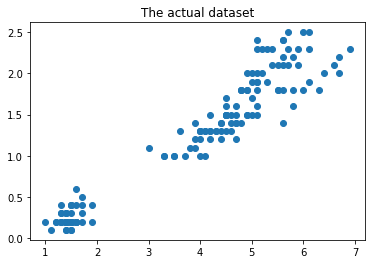

In [ ]:
plt.scatter(x=iris_df.petal_length,y=iris_df.petal_width)
plt.title("The actual dataset")

Text(0.5, 1.0, 'The actual dataset')

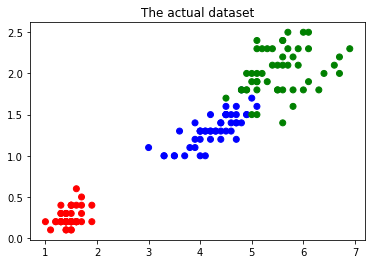

In [ ]:
import numpy as np
color =np.array(['red','blue','green'])
#adding the colors
plt.scatter(x=iris_df.petal_length,y=iris_df.petal_width,c=color[iris.target])
plt.title("The actual dataset")

Text(0.5, 1.0, 'The dataset post clustering')

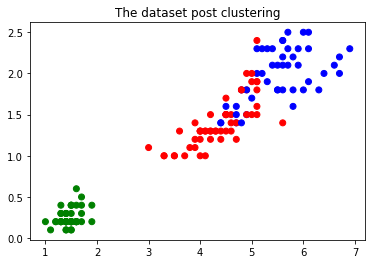

In [ ]:
color2=np.array(['green','red','blue'])
plt.scatter(x=iris_df.petal_length,y=iris_df.petal_width,c=color2[clustering.labels_])
plt.title("The dataset post clustering")

In [ ]:
distortions = []
K = range(1,18)
print(K)

range(1, 18)


In [ ]:
from scipy.spatial.distance import cdist
import math
iris_df.head()
X = iris_df.loc[:,['petal_length','petal_width']]
# Finding the distortion in every set as the min Euclidean distance between two points
for k in K: 
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeans_model.cluster_centers_,"euclidean"),axis=1))/X.shape[0])

In [ ]:
distortions

[1.707364436891335,
 0.583920126422277,
 0.36876646966749166,
 0.2992242581050885,
 0.26508349289751987,
 0.23423991426050322,
 0.2119816543916813,
 0.19701552084409207,
 0.18410484384588677,
 0.17148136023919788,
 0.16237979714219736,
 0.15957659071780197,
 0.15015296846004914,
 0.14464215263046162,
 0.1379278490250529,
 0.1311163178060909,
 0.1251304498294406]

range(1, 18)
0.1251304498294406


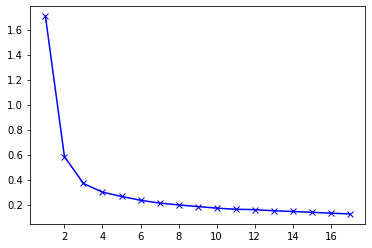

In [ ]:
print(K)
# checking for min of K value
print(np.min(distortions))
#Plotting for change in K value
plt.plot(K,distortions,'bx-')